In [3]:
print("hello world")

hello world


In [4]:
from gettext import install


%pip install tensorflow
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf # type: ignore
import matplotlib.pyplot as plt # type: ignore


In [6]:
import os
current = os.getcwd()
train_path = os.path.join(current,"datasets","Train")
test_path = os.path.join(current,"datasets","Test")
valid_path = os.path.join(current,"datasets","Valid")

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear", #used to resize the image
)

Found 900 files belonging to 3 classes.


In [8]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear", #used to resize the image
)

Found 300 files belonging to 3 classes.


In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred", 
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear", #used to resize the image
)

Found 900 files belonging to 3 classes.


In [11]:
cnn = tf.keras.models.Sequential() 

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 805ms/step - accuracy: 0.3580 - loss: 1.3971 - val_accuracy: 0.6467 - val_loss: 0.8527
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 823ms/step - accuracy: 0.6774 - loss: 0.6992 - val_accuracy: 0.7700 - val_loss: 0.5018
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7727 - loss: 0.5003 - val_accuracy: 0.7367 - val_loss: 0.6130
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 997ms/step - accuracy: 0.7669 - loss: 0.5509 - val_accuracy: 0.8467 - val_loss: 0.3962
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8130 - loss: 0.3714 - val_accuracy: 0.8500 - val_loss: 0.3798
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8565 - loss: 0.3242 - val_accuracy: 0.8467 - val_loss: 0.3709
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 957ms/step - accuracy: 0.9100 - loss: 0.2158 - val_accuracy: 0.8100 - val_loss: 0.5555
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9137 - loss: 0.2290 - val_accuracy: 0.9200

In [15]:
train_loss,train_acc = cnn.evaluate(training_set)
print('Taining accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.9760 - loss: 0.0867
Taining accuracy: 0.9711111187934875


In [17]:
val_loss,val_acc = cnn.evaluate(validation_set)
print('Valuation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.9085 - loss: 0.2137
Valuation accuracy: 0.9166666865348816


In [18]:
cnn.save('trained_plant_disease_model.keras')

In [19]:
training_history.history

{'accuracy': [0.38555556535720825,
  0.6877777576446533,
  0.7677778005599976,
  0.8033333420753479,
  0.8311111330986023,
  0.8755555748939514,
  0.9166666865348816,
  0.9355555772781372,
  0.9599999785423279,
  0.9122222065925598],
 'loss': [1.1932861804962158,
  0.6427643299102783,
  0.5050179958343506,
  0.4810168147087097,
  0.363120973110199,
  0.2957826852798462,
  0.19229984283447266,
  0.1781274378299713,
  0.10331771522760391,
  0.2002221643924713],
 'val_accuracy': [0.6466666460037231,
  0.7699999809265137,
  0.7366666793823242,
  0.846666693687439,
  0.8500000238418579,
  0.846666693687439,
  0.8100000023841858,
  0.9200000166893005,
  0.846666693687439,
  0.9166666865348816],
 'val_loss': [0.8526653051376343,
  0.5018429160118103,
  0.6129847168922424,
  0.39618366956710815,
  0.37975436449050903,
  0.3708857297897339,
  0.5554699301719666,
  0.18189840018749237,
  0.46894165873527527,
  0.19373343884944916]}

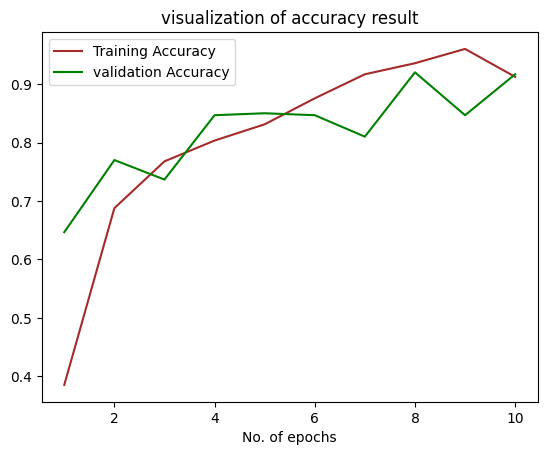

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label = 'validation Accuracy')
plt.xlabel('No. of epochs')
plt.title('visualization of accuracy result')
plt.legend()
plt.show()